### Jupyter mining company


## Jupyter

In [53]:
# !python -m pip install notebook

# mohu spoustet terminalova prikazy pomoci !

# bunky spustime zkratkou Shift + Enter

In [54]:
4+5

9

In [55]:
a = "prvni promnenna"
b = "druha promenna"
a
b

'druha promenna'

## Práce s pandas

In [56]:
# !python -m pip install pandas

In [57]:
import pandas

Dva dulezite <b>objekty</b>, se kterými budeme pracovat jsou <b>DataFrame</b>(pro nas tabulka) a <b>Series</b>(posloupnost)
V pandas můžeme DataFrame vytvořit dvema zpusoby, takto:

In [58]:
barvy = pandas.DataFrame({"Barvy": ["Red", "Blue", "Green", "Yellow"]})
barvy

,Barvy
0,Red
1,Blue
2,Green
3,Yellow


nebo takto:

In [59]:
zvirata = pandas.DataFrame(["pes", "kocka", "slon", "opice"], index=[1,2,3,4], columns=["zvire"])
zvirata

,zvire
1,pes
2,kocka
3,slon
4,opice


Posloupnost pak takto:

In [60]:
# [2, 4, 6, 8, 10] == [i*2 for i in range(6)]
posloupnost = pandas.Series([2, 4, 6, 8, 10, 12, 14], index=[0, 1, 2, 3, 4, 5, 6])
posloupnost

0     2
1     4
2     6
3     8
4    10
5    12
6    14
dtype: int64

In [61]:
import json
with open("sedm_trpasliku.json", "r") as file:
    sedm_trpasliku_raw = json.load(file)

sedm_trpasliku = pandas.DataFrame(sedm_trpasliku_raw)
# Prófa, Kejchal, Rejpal, Šmudla, Stydlín, Štístko, Dřima
# sedm_trpasliku = pandas.DataFrame({
#     "Jmena": ["Prófa", "Kejchal", "Rejpal", "Šmudla", "Stydlín", "Štístko", "Dřima"],
#     "Vyska": [144, 147, 144, 130, 139, 135, 142],
#     "Rasa": ["Trpaslik", "Trpaslik", "Trpaslik", "Trpaslik", "Trpaslik", "Trpaslik", "Trpaslik"],
#     "Vek": [321, 274, 286, 654, 476, 540, 356],
# })

Funkci info() mohu zjistit základni informace o datovych typech ve sloupcich, stejně jako počty pozorováni

In [62]:
sedm_trpasliku.info() # vypise zakladni informace o datasetu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
Jmena    7 non-null object
Vyska    7 non-null int64
Rasa     7 non-null object
Vek      7 non-null int64
dtypes: int64(2), object(2)
memory usage: 304.0+ bytes


Další funkce která nám může o trpaslicích říct zajímavé informace je <code>describe()</code>

In [63]:
sedm_trpasliku.describe()  # zobrazi zakladni statisticke funkce

,Vyska,Vek
count,7.000000,7.000000
mean,139.857143,381.142857
std,3.132016,200.133646
min,135.000000,123.000000
25%,138.000000,280.000000
50%,140.000000,321.000000
75%,142.000000,505.000000
max,144.000000,654.000000


In [64]:
sedm_trpasliku.head(2)  # zobrazi prvni dva zaznamy

,Jmena,Vyska,Rasa,Vek
0,Prófa,140,Trpaslik,321
1,Kejchal,137,Trpaslik,274


In [65]:
sedm_trpasliku.tail(2)  # zobrazi posledni dva zaznamy

,Jmena,Vyska,Rasa,Vek
5,Štístko,135,Trpaslik,654
6,Dřima,142,Trpaslik,356


 funkce <code>sample()</code> nám náhodně vybere vzorek dat
 * frac=0.5 -> nahodne vybere polovinu z celého datasetu,
 * frac=1 -> vybere celý dataset

In [66]:
loterie = posloupnost.sample(frac=1)
loterie

1     4
2     6
5    12
4    10
3     8
6    14
0     2
dtype: int64

In [67]:
sedm_trpasliku["Loterie"] = loterie

sedm_trpasliku

,Jmena,Vyska,Rasa,Vek,Loterie
0,Prófa,140,Trpaslik,321,2
1,Kejchal,137,Trpaslik,274,4
2,Rejpal,144,Trpaslik,286,6
3,Šmudla,142,Trpaslik,654,8
4,Stydlín,139,Trpaslik,123,10
5,Štístko,135,Trpaslik,654,12
6,Dřima,142,Trpaslik,356,14


V tabulce vidíme že se nám sloupec "Loterie" znovu porovnal, díky indexům, aby jsme tomu zamezili použijeme funkci <code>reset_index()</code>

In [68]:
sedm_trpasliku["Loterie"] = loterie.reset_index(drop=True)

sedm_trpasliku

,Jmena,Vyska,Rasa,Vek,Loterie
0,Prófa,140,Trpaslik,321,4
1,Kejchal,137,Trpaslik,274,6
2,Rejpal,144,Trpaslik,286,12
3,Šmudla,142,Trpaslik,654,10
4,Stydlín,139,Trpaslik,123,8
5,Štístko,135,Trpaslik,654,14
6,Dřima,142,Trpaslik,356,2


Tabulku si můžeme také vytisknout způsobem jakým jsme zvyklí, pomocí <code>print()</code>

In [69]:
print(sedm_trpasliku)

     Jmena  Vyska      Rasa  Vek  Loterie
0    Prófa    140  Trpaslik  321        4
1  Kejchal    137  Trpaslik  274        6
2   Rejpal    144  Trpaslik  286       12
3   Šmudla    142  Trpaslik  654       10
4  Stydlín    139  Trpaslik  123        8
5  Štístko    135  Trpaslik  654       14
6    Dřima    142  Trpaslik  356        2


Takto si vybereme jen jeden sloupec:

In [70]:
sedm_trpasliku["Vyska"]

0    140
1    137
2    144
3    142
4    139
5    135
6    142
Name: Vyska, dtype: int64

Pomocí funkce <code>rename()</code> můžeme přejmenovat název sloupce

In [71]:
sedm_trpasliku = sedm_trpasliku.rename(columns={"Vek": "Trpasličí Věk"})
sedm_trpasliku

,Jmena,Vyska,Rasa,Trpasličí Věk,Loterie
0,Prófa,140,Trpaslik,321,4
1,Kejchal,137,Trpaslik,274,6
2,Rejpal,144,Trpaslik,286,12
3,Šmudla,142,Trpaslik,654,10
4,Stydlín,139,Trpaslik,123,8
5,Štístko,135,Trpaslik,654,14
6,Dřima,142,Trpaslik,356,2


Funkce <code>sort_values()</code> nám pomůže upořádat tabulku podle konkrétního sloupce

In [72]:
sedm_trpasliku.sort_values("Vyska", ascending=False)

,Jmena,Vyska,Rasa,Trpasličí Věk,Loterie
2,Rejpal,144,Trpaslik,286,12
3,Šmudla,142,Trpaslik,654,10
6,Dřima,142,Trpaslik,356,2
0,Prófa,140,Trpaslik,321,4
4,Stydlín,139,Trpaslik,123,8
1,Kejchal,137,Trpaslik,274,6
5,Štístko,135,Trpaslik,654,14


Na sloupcích můžeme taky provádět spostu operací tak jak jsme zvyklí z pythonu,snadno se tak dozvíme opravdový věk trpaslíků

In [73]:
opravdovy_vek = sedm_trpasliku["Trpasličí Věk"] // 9
opravdovy_vek

0    35
1    30
2    31
3    72
4    13
5    72
6    39
Name: Trpasličí Věk, dtype: int64

A pokud se nám některý sloupec znelíbí, pryč s ním!

In [74]:
sedm_trpasliku = sedm_trpasliku.drop(columns=["Rasa"])
sedm_trpasliku

,Jmena,Vyska,Trpasličí Věk,Loterie
0,Prófa,140,321,4
1,Kejchal,137,274,6
2,Rejpal,144,286,12
3,Šmudla,142,654,10
4,Stydlín,139,123,8
5,Štístko,135,654,14
6,Dřima,142,356,2


Není překvapením, že pandas má na výběr spoustu zajímavých funkcí jako <code>min()</code>, <code>max()</code>, <code>sum()</code>, <code>median()</code>, <code>mean()</code>, <code>apply()</code>

In [75]:
sedm_trpasliku.mean()

Vyska            139.857143
Trpasličí Věk    381.142857
Loterie            8.000000
dtype: float64

In [76]:
sedm_trpasliku.max(numeric_only=True)

Vyska            144
Trpasličí Věk    654
Loterie           14
dtype: int64

In [77]:
sedm_trpasliku.min(numeric_only=True)

Vyska            135
Trpasličí Věk    123
Loterie            2
dtype: int64

In [78]:
sedm_trpasliku["Splnil"] = sedm_trpasliku.apply(lambda x: True if x["Vyska"] >= 140 else False, axis=1)
sedm_trpasliku

,Jmena,Vyska,Trpasličí Věk,Loterie,Splnil
0,Prófa,140,321,4,True
1,Kejchal,137,274,6,False
2,Rejpal,144,286,12,True
3,Šmudla,142,654,10,True
4,Stydlín,139,123,8,False
5,Štístko,135,654,14,False
6,Dřima,142,356,2,True


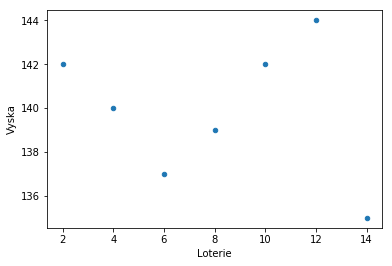

In [79]:
sedm_trpasliku.plot.scatter(x="Loterie", y="Vyska")

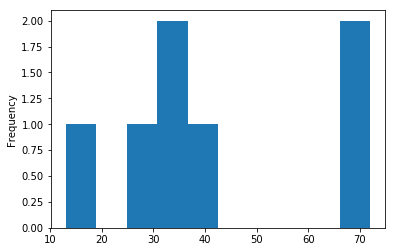

In [80]:
sedm_trpasliku["Trpasličí Věk"].apply(lambda x: x // 9).plot.hist()

In [81]:




# datovy typ? 
# vetsina funkci vraci data frame(chaining)
# iloc

# vyber sloupcu df[["A","B"]]
# .nunique()
## read_csv() i url s raw csv
# 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'

# melt X pivot
# loc zpracovává podle indexu
#  loc[0:3, 'Vyska':'Vek']
#  iloc pracuje s pozicí
#  zmena indexu sedm_trpasliku.index = sedm_trpasliku["Jmena"]
# + parametr: axis=1 <- prida sloupec

# rename

# drop_duplicates

# head X tail

# plot scatter hist

## Proces analýzy dat
Práce datového analytika se většinou drží následujícího postupu:

* Formulace otázky, kterou chceme zodpovědět
* Identifikace dat, která můžeme použít
* Získání dat (stažení, převod do použitelného formátu)
* Uložení dat
* Zkoumání dat
* Publikace výsledků

*(založeno na diagramu z knihy *Data Wrangling in Python* od Jacqueline Kazil & Katharine Jarmul, str. 3)*

Víme že pandas umí načíst dataset ze souboru .json další datové typy s kterými si pandas poradí například '.csv', '.xlxs', a zvládne i zdroje z internetu.
Pro naše další bádání si tak nahrajeme dataset kosatců, a to přímo z gitu

In [82]:
iris = pandas.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

Funkce <code>head()</code> nam vypise prvnich n-radku, defaultne 5

In [83]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Funkce <code>tail()</code> se chova podobne, jen vypise poslednich n-radku :)

In [84]:
iris.tail(7)

,sepal_length,sepal_width,petal_length,petal_width,species
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [85]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Chceme-li zjistit pocet zastupcu kategorii v sloupcich muzeme pouzit funkci value_counts()

In [86]:
iris["species"].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

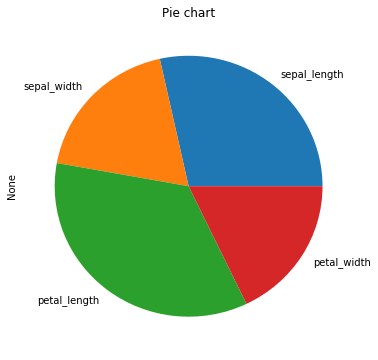

In [87]:
iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]].nunique().plot.pie(figsize=(6, 6), title="Pie chart")

Podivejme se spolecne na distribuci, ta se zavola pomoci funkce hist(), muzeme ji nastavit pocet prihradek,
nebo take pruhlednost

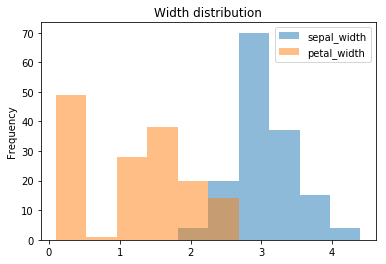

In [88]:
iris[["sepal_width", "petal_width"]].plot.hist(alpha=0.5, title="Width distribution")

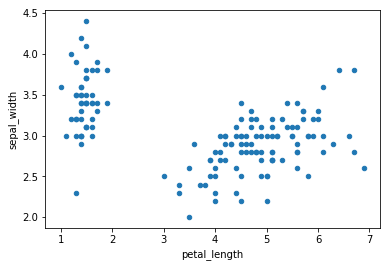

In [89]:
iris.plot.scatter(x="petal_length", y="sepal_width")

In [90]:
series = pandas.Series([1,8,4,6], index=['a', 'b', 'c', 'd'], name='series')
series

a    1
b    8
c    4
d    6
Name: series, dtype: int64

In [94]:
color = []
for i in iris["species"]:
    if i == "versicolor":
        color.append("blue")
    elif i == "virginica":
        color.append("red")
    elif i == "setosa":
        color.append("green")

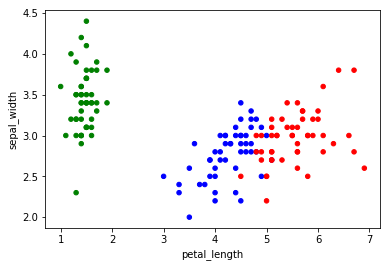

In [95]:
iris.plot.scatter(x="petal_length", y="sepal_width", c=color)